# Redo the HelloWorld Example

This file is trying to use technique to detect the handwritten data(mnist dataset).

This part includes:
* CNN
* data augmentation
* drop out layer


## Part I

Build the convnet, using VGG structure

In [1]:
from keras import models
from keras import layers

#making the neural network>>>
# The convnet part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#connect to the original part model
model.add(layers.Flatten())
#drop out
model.add(layers.Dropout(0.5))
# The original part
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
#making the neural network<<<

model.summary()


Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
____________

## Part II

Perprocess the data, using the data augmentation technique.

Train the model, using imageDataGenerator to do data augmentation.


In [2]:
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os, shutil

#data loading
DatasetDir = "/home/chen/LiChiChang/2020SpringThesis/dataset/mnist/mnist" #pls indicate your path
SmallDataDir = "/home/chen/LiChiChang/2020SpringThesis/dataset/mnist/shrink" #pls indicate your path

trainDir = os.path.join(SmallDataDir, 'train')
validationDir = os.path.join(SmallDataDir, 'validation')

if os.path.exists(SmallDataDir):
    shutil.rmtree(SmallDataDir)

os.mkdir(SmallDataDir)
os.mkdir(validationDir)
os.mkdir(trainDir)

def loadData(src, dst, format, start, end):
    dataList = []
    for i in range(start, end):
        dataList.append(format.format(i))

    for data in dataList:
        for j in range(10):
            if(not os.path.exists(os.path.join(dst, str(j)))):
                os.mkdir(os.path.join(dst, str(j)))
            srcData = os.path.join(os.path.join(src, str(j)), data)
            dstData = os.path.join(os.path.join(dst, str(j)),data)
            shutil.copyfile(srcData, dstData)

loadData(DatasetDir, trainDir, '{}.jpg', 0, 5299)
loadData(DatasetDir, validationDir, '{}.jpg', 5300, 6300)

#augmentation function
DataGen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=False,)

trainGenerator = DataGen.flow_from_directory(trainDir, batch_size=100,target_size=(28,28),color_mode='grayscale',class_mode='categorical')
validationGenerator = DataGen.flow_from_directory(validationDir, batch_size=100,target_size=(28,28),color_mode='grayscale', class_mode='categorical')

history = model.fit_generator(trainGenerator, steps_per_epoch=100, epochs=50, validation_data=validationGenerator, validation_steps=50)


Found 52990 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.

Epoch 1/50
100/100 [==============================] - 7s 72ms/step - loss: 2.0939 - acc: 0.2432 - val_loss: 1.6229 - val_acc: 0.4310
Epoch 2/50
100/100 [==============================] - 7s 71ms/step - loss: 1.5943 - acc: 0.4478 - val_loss: 1.1616 - val_acc: 0.6026
Epoch 3/50
100/100 [==============================] - 8s 77ms/step - loss: 1.2474 - acc: 0.5757 - val_loss: 0.9457 - val_acc: 0.7080
Epoch 4/50
100/100 [==============================] - 7s 74ms/step - loss: 1.0272 - acc: 0.6610 - val_loss: 0.9621 - val_acc: 0.7288
Epoch 5/50
100/100 [==============================] - 7s 72ms/step - loss: 0.9021 - acc: 0.7030 - val_loss: 0.9207 - val_acc: 0.7962
Epoch 6/50
100/100 [==============================] - 8s 76ms/step - loss: 0.7934 - acc: 0.7428 - val_loss: 0.7025 - val_acc: 0.8228
Epoch 7/50
100/100 [==============================] - 7s 72ms/step - loss: 0.7301 - acc: 0.7627 - val_loss: 0.546

## Part III

Plot the analysis graph, including accuracy and loss of each training data and validation data.

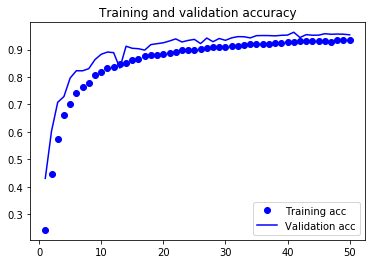

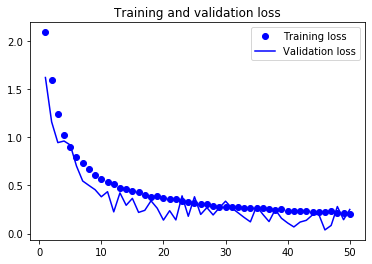

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

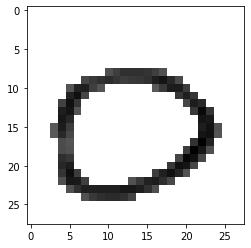

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


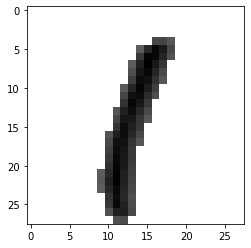

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


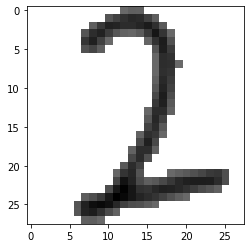

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[2]


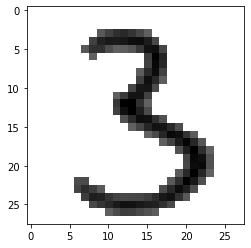

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3]


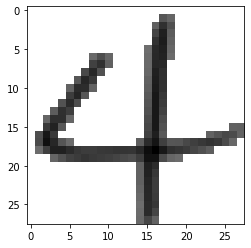

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[4]


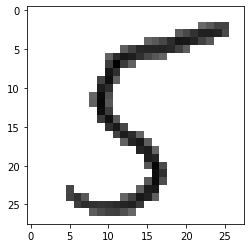

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[5]


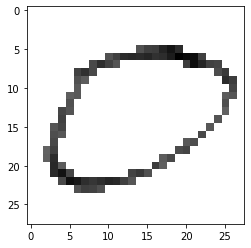

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


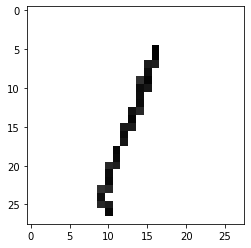

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


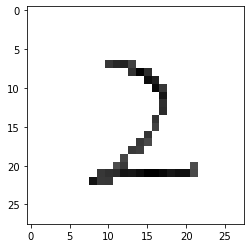

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[2]


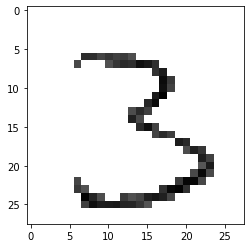

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3]


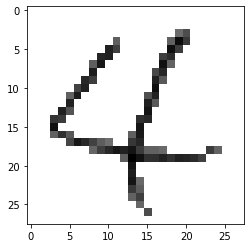

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


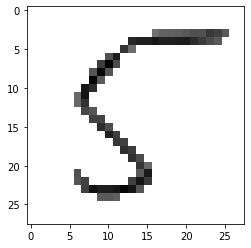

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


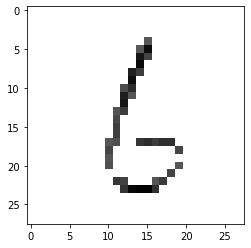

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


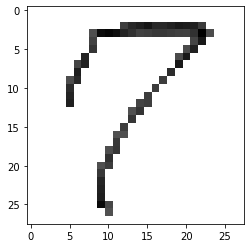

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


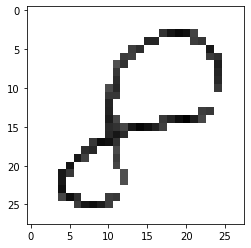

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


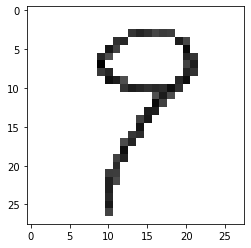

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


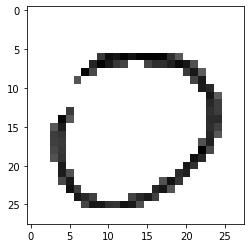

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


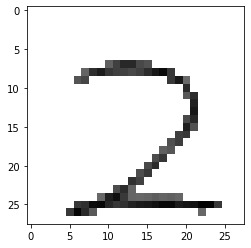

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[2]


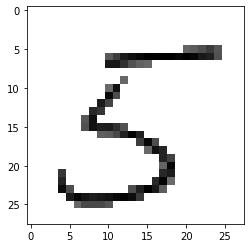

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[8]


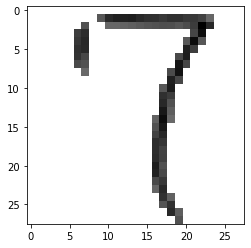

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[2]


In [4]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

def rgb_to_gray(imgArr,istest):
    shape = imgArr.shape
    if((imgArr.shape)[0] != 3 and istest == 0):
        return imgArr
    elif((imgArr.shape)[0] == 3):
        digit = np.zeros((28,28,1))
        for i in range(28):
            for j in range(28):
                ch1 = imgArr[i][j][0]
                ch2 = imgArr[i][j][1]
                ch3 = imgArr[i][j][2]
                digit[i][j][0] = ((ch1+ch2+ch3)/3)
        return digit
    else:
        digit = np.zeros((28,28,1))
        for i in range(28):
            for j in range(28):
                ch1 = imgArr[i][j][0]
                if(255-ch1 < 130):
                    digit[i][j][0] = 0
                else:
                    digit[i][j][0] = (255-ch1)
        return digit

def testList(name):
    digit = image.load_img("/home/chen/LiChiChang/2020SpringThesis/dataset/mnist/test/"+str(name)+".jpg",color_mode='grayscale')
    digit = digit.resize(size=(28,28))
    digit = image.img_to_array(digit,)
    digit = rgb_to_gray(digit,1)

    plt.imshow(digit.reshape(28,28), cmap=plt.cm.get_cmap('binary'))
    plt.show()

    print(model.predict(np.array([digit])))
    print(model.predict_classes(np.array([digit])))

for i in range(20):
    testList(i+1)